# 5주차 프로젝트
`TODO1`부터 `TODO7`까지 올바르게 채우시면 다음과 같은 그림이 나옵니다.

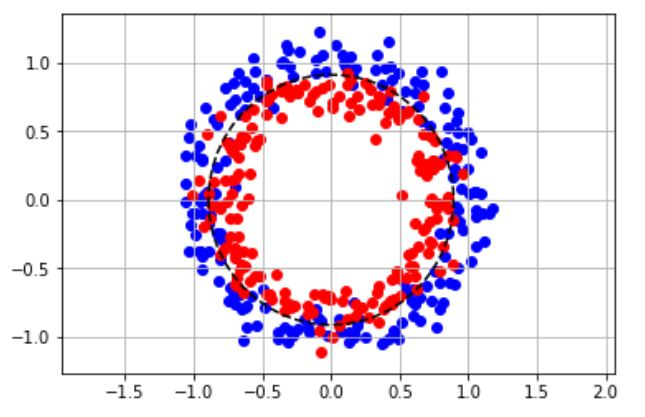

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_circles
from matplotlib.pylab import plt
from pandas import DataFrame
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels.flatten() == k
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)

    theta = np.linspace(-np.pi, np.pi)
    assert -W_[0] / W_[1] >= 0
    a = np.sqrt(-W_[0] / W_[1])
    b = np.sqrt(-W_[0] / W_[2])
    x1 = a * np.cos(theta)
    x2 = b * np.sin(theta)
    plt.plot(x1, x2, '--k')

    plt.grid()
    plt.axis('equal')
    plt.show()

## Data 생성

In [ ]:
# generate 2d classification dataset
xy, labels = make_circles(n_samples=400, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.axis('equal')
plt.grid()
plt.show()

## Feature/Label 정리

Boundary가 직선이 아닌 원으로 나오도록 Feature를 설정해보세요.

Hint : 원의 방정식 $ w_0\cdot 1 + w_1 x^2 + w_2 y^2 = 0 $ if $w_0 <0$

In [ ]:
# TODO1
features = np.array([None for xval, yval in xy])
features[:5], labels[:5]

In [ ]:
num_features = len(features[0])
W0 = np.array([-1., 9., 9.]).reshape(-1,1)
print(W0)

In [ ]:
plot_scatter(W0, xy, labels)

## Gradient Descent

1. Model 정의
$$\hat{y} = \sigma(w_0 + w_1 x_1 + w_2x_2)$$
1. Loss function정의 : Cross-Entropy
$$ loss(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N - y_i\log(\hat{y_i}) - (1-y_i) \log(1-\hat{y_i})$$
1. Run train!

In [ ]:
# Placeholders
print(num_features)
print(features.shape)
print(labels.shape)
print(labels.reshape(-1,1).shape)
x = tf.placeholder(tf.float64, shape=(None, num_features))
y = tf.placeholder(tf.float64, shape=(None, 1))

# Weight
W = tf.Variable(W0)

# Model
model = None # TODO2

# Loss
loss = None # TODO3

# Optimization
lr = 1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

MaxEpochs = 500
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        # TODO4
        None
    W_gd = sess.run(W).flatten()

In [ ]:
plot_scatter(W_gd, xy, labels)

## Stochastic Gradient Decsent

1. Optimizer 선택
1. Shuffle 하기
1. batch 만들기

In [ ]:
from helper import generate_batches

In [ ]:
# Placeholders
x = tf.placeholder(tf.float64, shape=(None, num_features))
y = tf.placeholder(tf.float64, shape=(None, 1))

# Weight
W = tf.Variable(W0)

# Model
model = tf.sigmoid(tf.matmul(x, W))

# Loss
loss = tf.reduce_sum(-y * tf.log(model) - (1 - y) * tf.log(1 - model))

# Optimization
lr = 1
optimizer = None# TODO5
train = optimizer.minimize(loss)

# Shufflle
# TODO6
idx = np.arange(0, len(features))

batch_size = 10
MaxEpochs = 500
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        # TODO7
        None
    W_gd = sess.run(W).flatten()